In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import sys
import os
from datetime import datetime

In [2]:
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax 

In [3]:
from PlotUtils import getColour, setMplParam, getHistoParam, getHistoParamWithBinWidth

In [4]:
setMplParam(10)

In [5]:
def readNFLPlay():
    subDirPath = '../NFLPlay/'
    plays = pd.read_csv(subDirPath+'plays.csv')
    return plays

In [6]:
NFLplays_raw = readNFLPlay()
# 50 sec on Cyan's pc
# 20 sec on Cyan's laptop

## the columns

In [7]:
NFLplays_raw.shape

(870384, 44)

In [8]:
NFLplays_raw.columns

Index(['playId', 'gameId', 'playSequence', 'quarter', 'possessionTeamId',
       'nonpossessionTeamId', 'playType', 'playType2', 'playTypeDetailed',
       'playNumberByTeam', 'gameClock', 'gameClockSecondsExpired',
       'gameClockStoppedAfterPlay', 'down', 'distance', 'fieldPosition',
       'distanceToGoalPre', 'noPlay', 'playDescription', 'playStats',
       'playDescriptionFull', 'typeOfPlay', 'changePossession', 'turnover',
       'safety', 'offensiveYards', 'netYards', 'firstDown', 'efficientPlay',
       'evPre', 'evPost', 'evPlay', 'fourthDownConversion',
       'thirdDownConversion', 'scorePossession', 'scoreNonpossession',
       'homeScorePre', 'visitingScorePre', 'homeScorePost',
       'visitingScorePost', 'distanceToGoalPost', 'fieldGoalProbability',
       'huddle', 'formation'],
      dtype='object')

In [9]:
indices = ['playId', 'gameId']

playCircumstances = ['playSequence', 
                'quarter', 
                'possessionTeamId',
                'nonpossessionTeamId', 
                'playNumberByTeam',
                'gameClock', 
                'down', 
                'distance',
                'distanceToGoalPre',
                'netYards',
                'scorePossession',
                'scoreNonpossession',
                'fieldGoalProbability',]

playTypes = ['playType',
            'huddle',
            'formation']

playResults = ['playResult',
              'gameClockSecondsExpired',
              'gameClockStoppedAfterPlay', 
               'noPlay', # is the play a penalty
               'offensiveYards',
               ]

playSubsequences = [
    # 'isClockRunning', 
                        'changePossession', 
                        'turnover',
                        'safety',
                        'firstDown',]

idk = [ 'typeOfPlay',
        'fourthDownConversion',
        'thirdDownConversion',
        'homeScorePre', 
        'visitingScorePre',
        'homeScorePost',
        'visitingScorePost',
        'distanceToGoalPost']

# the original dataset has 3 columns of their own prediction of the play we may be able to use them as a reference
reference = ['evPre',
             'evPost', 
             'evPlay',]

exclude = [ 'playTypeDetailed', # redundant to playType2
            'fieldPosition', 
            'playDescription',
            'playStats',
            'playDescriptionFull', 
            'efficientPlay']

# Data Preprocessing

In [10]:
import Preprocess as pp

In [11]:
NFLplays = pp.runPreprocess(NFLplays_raw, exclude, idk, reference)
# 8 sec on Cyan's laptop

In [12]:
NFLplays.columns

Index(['playId', 'gameId', 'playSequence', 'quarter', 'possessionTeamId',
       'nonpossessionTeamId', 'playType', 'playNumberByTeam', 'gameClock',
       'gameClockSecondsExpired', 'gameClockStoppedAfterPlay', 'down',
       'distance', 'distanceToGoalPre', 'noPlay', 'changePossession',
       'turnover', 'safety', 'offensiveYards', 'netYards', 'firstDown',
       'scorePossession', 'scoreNonpossession', 'fieldGoalProbability',
       'huddle', 'formation', 'playResult'],
      dtype='object')

In [13]:
NFLplays['playResult'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [14]:
NFLplays.shape

(870384, 27)

* `NFLplays_split`: Game-wise slitted data

In [15]:
NFLplays_split = pp.getSplittedList(NFLplays)
# 18.8sec

In [16]:
print(f'Number of columns: {len(NFLplays.columns)}')

Number of columns: 27


In [17]:
print(f'Number of games: {len(NFLplays_split)}')

Number of games: 5308


In [18]:
print(f'Number of plays in the first game: {len(NFLplays_split[0])}')
print(f'Number of plays in the second game: {len(NFLplays_split[1])}')
print(f'Number of plays in the third game: {len(NFLplays_split[2])}')

Number of plays in the first game: 164
Number of plays in the second game: 162
Number of plays in the third game: 170


In [19]:
def plotHistPlaySequences(NFLplays_split):
    sequences = np.zeros(len(NFLplays_split))
    for i in range(len(NFLplays_split)):
        sequences[i] = len(NFLplays_split[i])
    Nbins, binwidth, counts, x_centres = getHistoParam(sequences)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(sequences, bins=Nbins, histtype='step', hatch='/')
    ax.set_xlabel('Number of plays in a game')
    ax.set_ylabel('Counts')
    ax.set_title('Number of plays in a game')
    
    d = {'N' : len(sequences),
        'mean' : f'{np.mean(sequences):.2f}',
        'median' : f'{int(np.median(sequences))}',
        'max' : f'{int(np.max(sequences))}',
        'min' : f'{int(np.min(sequences))}',
        'std' : f'{np.std(sequences):.2f}',
        '25%' : f'{int(np.percentile(sequences, 25))}',
        '75%' : f'{int(np.percentile(sequences, 75))}',
        'N bins' : f'{Nbins:d}',
        'bin width' : f'{binwidth:.2f}',
        }
    add_text_to_ax(0.05, 0.95, nice_string_output(d), ax, fontsize=12)

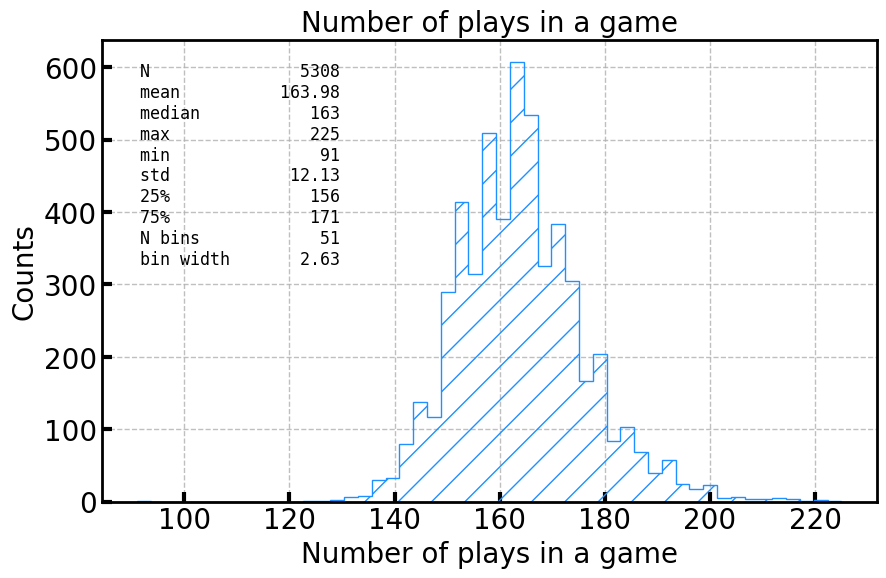

In [20]:
plotHistPlaySequences(NFLplays_split)

> primitive information before commencing the project 
## LSTM model
* **input** : [circumstance, type, result]
* **output** : (new) [circumstance, type, result]  
* **padding**: sets the number of plays of each game as the maximum value of them
* **masking**: adds exception on learning, making the model skip the padded data 
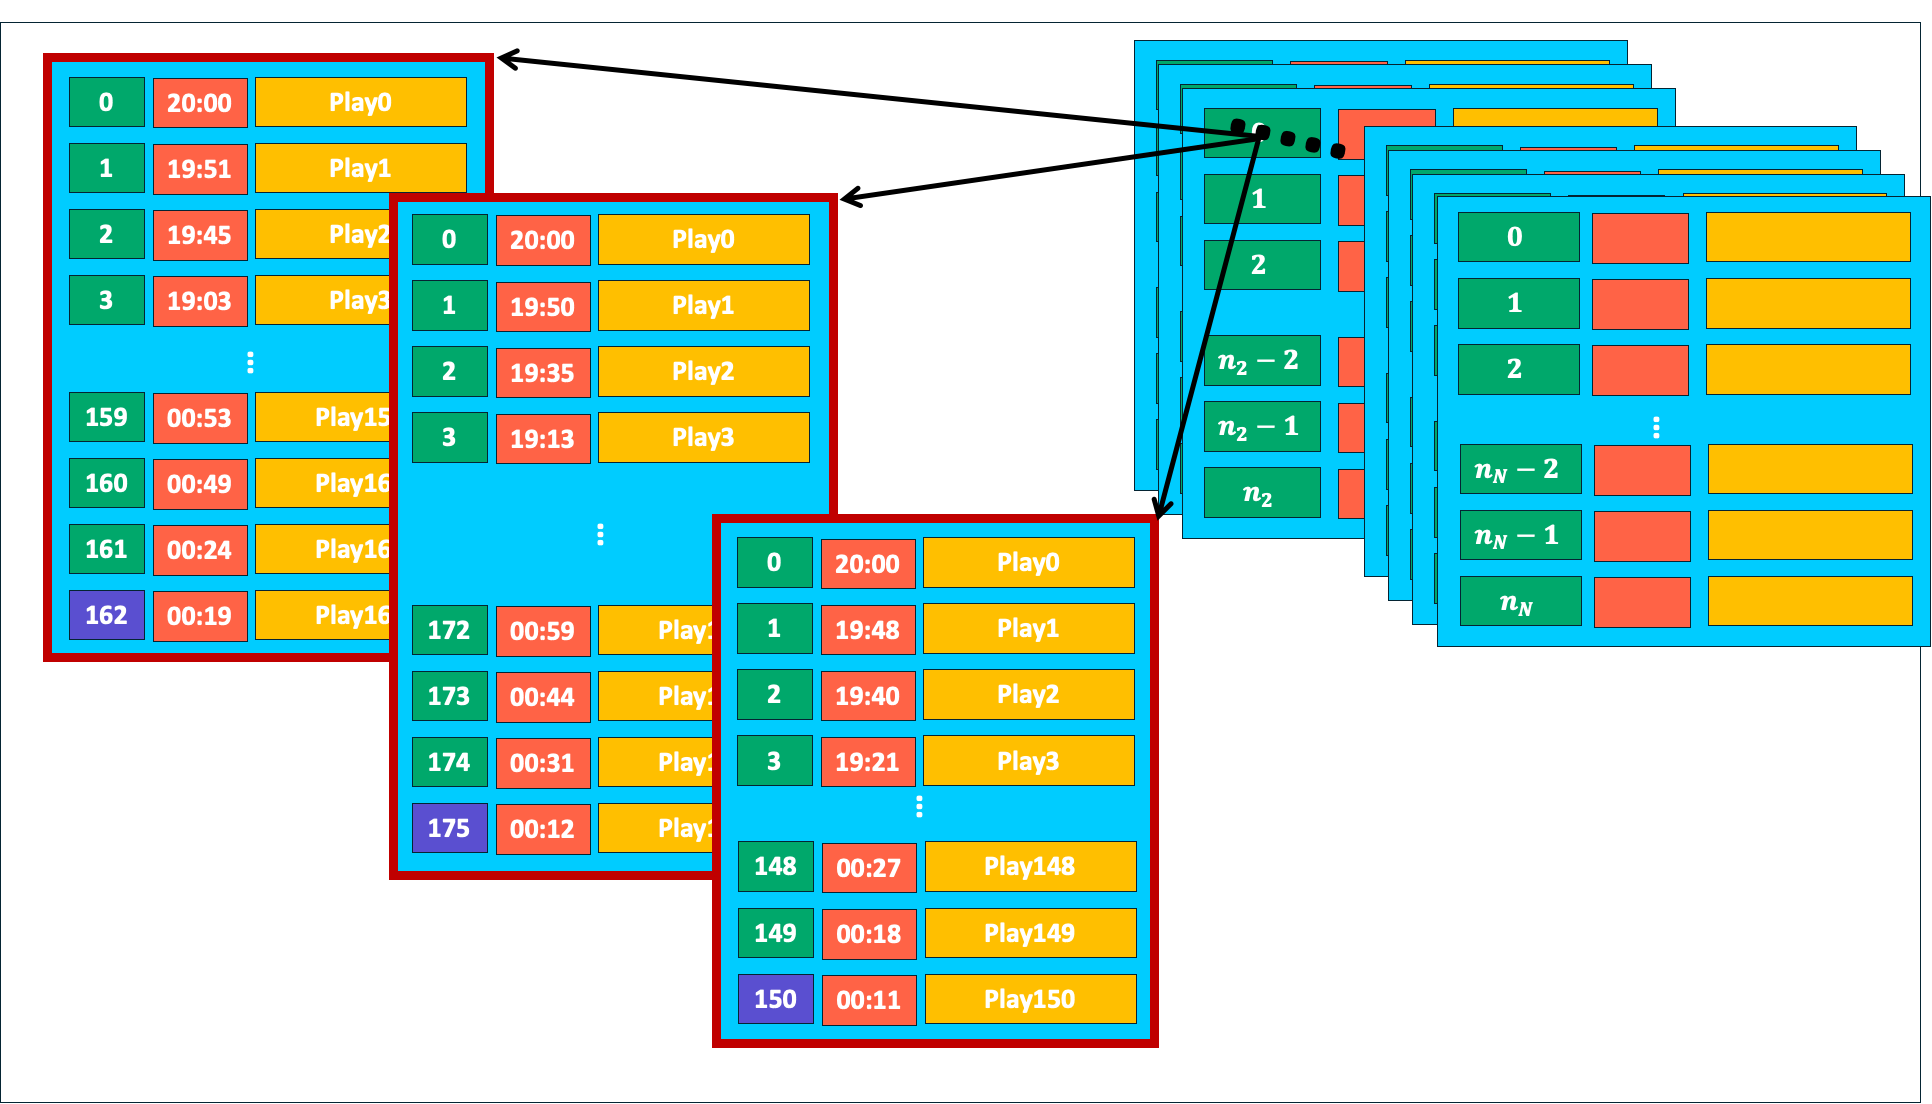

## LSTM model options
1. `return_sequences`
   * True: returns the full sequence of outputs, each element being the output of the LSTM at each time step.
   * False: returns only the last output of the sequence, a single vector, which is the output of the LSTM at the final time step
2. `loss` : the loss function
   * `categorical_crossentropy`: multi-class classification
   * `binary_crossentropy`: binary classification
   * `mse`: regression
3. `activation`: activation function
   * `softmax`: multi-class classification
   * `sigmoid`: binary classification
   * `linear`: regression
4. `metric`
   * `accuracy`, `precision`, `recall`, `f1-score` : classification
   * `mae` : regression

## What is RNN (Recurrent Neural Network)? - TOP DOWN, 
(profread by ChatGPT)

### General Aspects of NN

* **Forward Pass**
  * The input data is passed through the network layers to generate an output.
  * The output is compared to the target values using the loss function.
  
* **Loss Function ($ \mathcal{L} $)**: Indicator of how well the network predicts
  * Calculates the error between the prediction and the true value.
  * Common examples: MSE (Mean Squared Error) for regression or Cross-Entropy Loss for classification.

* **Backpropagation**
  * The error is propagated backward through the network.
  * Computes $( \frac{\partial \mathcal{L}}{\partial \theta} )$, the gradient of the loss function with respect to the parameters.
    * This represents the sensitivity of $( \mathcal{L} )$ with respect to the parameters.

* **Gradient Descent**
  * Updates the parameters in a direction that reduces the loss.
  * Uses optimisation algorithms like SGD (Stochastic Gradient Descent).

### Why RNN (LSTM, GRU)?

* To minimise $( \mathcal{L} )$, find the gradient of the loss function with respect to the parameters.
* A solution for the **vanishing gradient problem** of traditional NNs, which typically emerges during deep iterations or in networks handling long sequences.

> ##### What is the Vanishing Gradient Problem?
> * In NNs, the gradients of $( \mathcal{L} )$ with respect to the parameters are multiplied by the weights.
> * If the weights are small, the gradients diminish exponentially as they are propagated.
> * This is problematic for learning long-term dependencies.

* Solutions to this problem include LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit).


#### Notes about `units` in `keras.layer.LSTM`(it is the **level of complexity**)
* each LSTM layer maintains its own cell state and output
* `units` is the number of the memory cells in the layer
* small vs large
  * small: may not capture the complexity of the data, leading to underfitting.
  * large: can lead to overfitting, where the model performs well on training data but poorly on unseen data
* large data size: can typically support a more complex model with more units.
#### Notes about `batch_size` in `model.fit`
* it determines how many games are passed through the network before updating the model's weights.
* `batch_size = 32`: the model processes 32 games at a time before performing a backpropagation step and updating the weights.
* Smaller batch sizes can provide more stable convergence but may take longer per epoch.
* For the sake of memory access patterns, use powers of 2
  * For larger datasets, batch sizes of 64, 128, or even 256 can be effective.

* functions with `ext` tags are renewed functions to run for extened set of the features

* custom activation needed

# <span style="color:tomato">**Function Listing and Descriptions for LSTM.py**</span>

#### 1. `plotActivations()`
Plots various activation functions.
- **No Parameters.**
- **No Returns.**
- **Description:**
  - Plots the following activation functions: Softplus, Tanh, ReLU, Leaky ReLU, PReLU, ELU, SELU, Sigmoid, Hard Sigmoid, Hard Tanh.

#### 2. `trainLSTM(NFLplays_split_train, activators, fileName, isDebug=False, isSave=False)`
Trains the LSTM model on provided training data.
- **Parameters:**
  - `NFLplays_split_train` (list): List of training sequences.
  - `activators` (dict): Dictionary of activation functions for different layers.
  - `fileName` (str): Name of the file to save the model.
  - `isDebug` (bool, optional): Whether to print debug information. Default is False.
  - `isSave` (bool, optional): Whether to save the trained model. Default is False.
- **Returns:**
  - `model` (tf.keras.Model): Trained LSTM model.
  - `scalers` (dict): Dictionary of scalers used for regression features.

#### 3. `loadModel(fileName)`
Loads a saved LSTM model from file.
- **Parameters:**
  - `fileName` (str): Name of the file containing the saved model.
- **Returns:**
  - `model` (tf.keras.Model): Loaded LSTM model.

#### 4. `loadScaler(fileName)`
Loads a saved scaler from file.
- **Parameters:**
  - `fileName` (str): Name of the file containing the saved scaler.
- **Returns:**
  - `scaler` (sklearn.preprocessing): Loaded scaler.

#### 5. `predictExtendedLSTM(model, scalers, testGame, isDebug=False)`
Makes predictions using the trained LSTM model and builds a comparison DataFrame.
- **Parameters:**
  - `model` (tf.keras.Model): Trained LSTM model.
  - `scalers` (dict): Dictionary of scalers used for regression features.
  - `testGame` (pd.DataFrame): DataFrame of test game data.
  - `isDebug` (bool, optional): Whether to print debug information. Default is False.
- **Returns:**
  - `dfs` (dict): Dictionary of DataFrames comparing actual and predicted values.
  - `Nplays` (int): Number of plays predicted.

#### 6. `getActivationSummary(debugTrain, debugTest, isDebug=False)`
Trains and evaluates the model using different activation functions for clock-related features.
- **Parameters:**
  - `debugTrain` (list): List of training sequences for debugging.
  - `debugTest` (list): List of test sequences for debugging.
  - `isDebug` (bool, optional): Whether to print debug information. Default is False.
- **Returns:**
  - `results` (dict): Dictionary of results for each activation function.

#### 7. `runPrediction(model, scaler, testDataList, isDebug=False)`
Runs predictions on a list of test games using the trained LSTM model.
- **Parameters:**
  - `model` (tf.keras.Model): Trained LSTM model.
  - `scaler` (sklearn.preprocessing): Scaler used for regression features.
  - `testDataList` (list): List of test game data.
  - `isDebug` (bool, optional): Whether to print debug information. Default is False.
- **Returns:**
  - `myPrecious` (list): List of DataFrames containing prediction results for each test game.


In [21]:
import LSTM as lstm

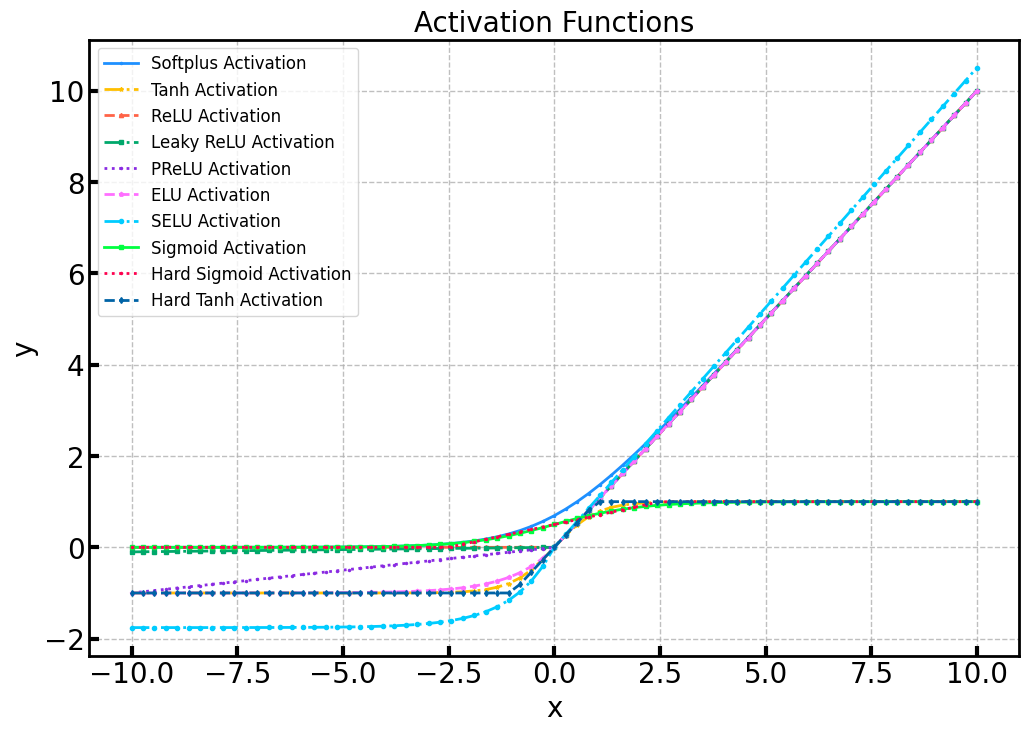

In [22]:
lstm.plotActivations()

I used these variable names

* `debugTrain`, `debugTest`, `model_test`, `scaler_test`for debugging
* `trainGames`, `testGames`, `model`, `scaler` for actual model building

In [23]:
debugTrain, debugTest = pp.separateTrainTest(NFLplays_split, test_size=0.9)
print(f'Number of games in the training set: {len(debugTrain)}')
print(f'Number of games in the test set: {len(debugTest)}')

Number of games in the training set: 531
Number of games in the test set: 4777


In [24]:
testFraction = 0.2

In [25]:
gamesTrain, gamesTest = pp.separateTrainTest(NFLplays_split, test_size=testFraction)
print(f'Number of games in the training set: {len(gamesTrain)}')
print(f'Number of games in the test set: {len(gamesTest)}')

Number of games in the training set: 4247
Number of games in the test set: 1061


* check if the gameClockSecondsExpired makes sense  
`4` (quarters) $\times$ `15`(minutes per quarter) $\times$ `60` (seconds in a minute) = <span style="color:tomato">**3600** seconds</span> 

In [26]:
print(f'the sum of gameClockSecondsExpired in the first game: {NFLplays_split[0]["gameClockSecondsExpired"].sum()}')

the sum of gameClockSecondsExpired in the first game: 3600


`compareActivation_clock` is a test function to see which activation function suits best for clock prediction

`getActivationSummary` investigates the clock for different activation functions
* **only for the testing**(not necessary for the prediction)
* the list of activation can be modified
* took 12 min on my laptop when 0.1 is used for training fraction
* summary copied from my run below 

In [27]:
# clock_activations = ['tanh', 'relu', 'softplus', 'elu', 'selu']
# clock_summary = lstm.getActivationSummary(debugTrain, debugTest, clock_activations, isDebug=False)
# 12 min

### Model Performance Summary

#### Tanh Activation:
- **Training Time:** 107.62 seconds
- **Prediction Time:** 56.12 seconds
- **Val Loss (Epoch 10):** 11.0172
- **Predictions:**
  - **Cumulative Predicted:** 259.74
  - **Cumulative Actual:** 436.0

#### ReLU Activation:
- **Training Time:** 98.49 seconds
- **Prediction Time:** 63.62 seconds
- **Val Loss (Epoch 10):** 10.8257
- **Predictions:**
  - **Cumulative Predicted:** 172.50
  - **Cumulative Actual:** 436.0

#### Softplus Activation:
- **Training Time:** 99.77 seconds
- **Prediction Time:** 29.39 seconds
- **Val Loss (Epoch 10):** 10.5465
- **Predictions:**
  - **Cumulative Predicted:** 385.30
  - **Cumulative Actual:** 436.0

#### ELU Activation:
- **Training Time:** 103.76 seconds
- **Prediction Time:** 36.73 seconds
- **Val Loss (Epoch 10):** 10.4138
- **Predictions:**
  - **Cumulative Predicted:** 119.36
  - **Cumulative Actual:** 436.0

#### SELU Activation:
- **Training Time:** 112.51 seconds
- **Prediction Time:** 12.80 seconds
- **Val Loss (Epoch 10):** 10.7915
- **Predictions:**
  - **Cumulative Predicted:** 623.96
  - **Cumulative Actual:** 436.0


* ### <span style='color:dodgerblue'> **you can set the activation functions using** `activators` </span>

In [28]:
activators = {
    'LSTM': 'tanh',
    'classification': 'softmax', # don't change
    'clocks': 'softplus', # or 'tanh'
    'yards': 'relu',
}

* <span style='color:dodgerblue'> **for the debugging**</span>(you can comment out)

In [29]:
model_debug, scaler_debug = lstm.trainLSTM(debugTrain, activators, 'debug.keras', isDebug=False, isSave=False)
lstm.savePrediction(model_debug, scaler_debug, debugTest[:10], 'debug', isDebug=False)
prediction_debug = lstm.loadPrediction(debugTest[:10], 'debug')
# 4 min on Cyan's laptop
# 1 min 10 sec on Cyan's desktop

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None, 13)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, None, 13)  │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking (Masking)   │ (None, None, 13)  │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, None)      │          0 │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, None, 100) │     45,600 │ masking[0][0],    │
│                     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ playType (Dense)    │ (None, None, 11)  │      1,111 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ huddle (Dense)      │ (None, None, 3)   │        303 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ formation (Dense)   │ (None, None, 7)   │        707 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ playResult (Dense)  │ (None, None, 25)  │      2,525 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noPlay (Dense)      │ (None, None, 2)   │        202 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gameClockSecondsEx… │ (None, None, 1)   │        101 │ lstm[0][0]        │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gameClockStoppedAf… │ (None, None, 1)   │        101 │ lstm[0][0]        │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ offensiveYards      │ (None, None, 1)   │        101 │ lstm[0][0]        │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 50,751 (198.25 KB)

 Trainable params: 50,751 (198.25 KB)

 Non-trainable params: 0 (0.00 B)

Preparing data: 100%|██████████| 531/531 [00:11<00:00, 46.94it/s]


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - formation_accuracy: 0.1024 - gameClockSecondsExpired_mean_squared_error: 0.4372 - gameClockStoppedAfterPlay_mean_squared_error: 0.6884 - huddle_accuracy: 0.1573 - loss: 15.0156 - noPlay_accuracy: 0.5542 - offensiveYards_mean_squared_error: 3.3784 - playResult_accuracy: 0.0465 - playType_accuracy: 0.1855 - val_formation_accuracy: 0.1575 - val_gameClockSecondsExpired_mean_squared_error: 0.3512 - val_gameClockStoppedAfterPlay_mean_squared_error: 0.5241 - val_huddle_accuracy: 0.2103 - val_loss: 14.2355 - val_noPlay_accuracy: 0.7452 - val_offensiveYards_mean_squared_error: 3.3956 - val_playResult_accuracy: 0.0497 - val_playType_accuracy: 0.2197
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - formation_accuracy: 0.2812 - gameClockSecondsExpired_mean_squared_error: 0.3749 - gameClockStoppedAfterPlay_mean_squared_error: 0.5084 - huddle_accuracy: 0.2115 - loss: 13.9397 - noPlay_accuracy: 0.7472 - offensiveYards_mean_squared_error: 3.3570 -

Predicting test games: 100%|██████████| 10/10 [00:43<00:00,  4.39s/it]


* # <span style='color:tomato'> **The Prediction Runs Here**</span>
train and prediction took 82 min on Cyan's desktop

In [30]:
fileName = f"LSTM_{datetime.today().strftime('%d%m%y')}_{int((1-testFraction)*100)}.keras"

In [31]:
model, scaler = lstm.trainLSTM(gamesTrain, activators, fileName, isDebug=False, isSave=True)
# 2 min on Cyan's desktop

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None, 13)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, None, 13)  │          0 │ input_layer_1[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking_1 (Masking) │ (None, None, 13)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any_1 (Any)         │ (None, None)      │          0 │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, None, 100) │     45,600 │ masking_1[0][0],  │
│                     │                   │            │ any_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ playType (Dense)    │ (None, None, 11)  │      1,111 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ huddle (Dense)      │ (None, None, 3)   │        303 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ formation (Dense)   │ (None, None, 7)   │        707 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ playResult (Dense)  │ (None, None, 26)  │      2,626 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noPlay (Dense)      │ (None, None, 2)   │        202 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gameClockSecondsEx… │ (None, None, 1)   │        101 │ lstm_1[0][0]      │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gameClockStoppedAf… │ (None, None, 1)   │        101 │ lstm_1[0][0]      │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ offensiveYards      │ (None, None, 1)   │        101 │ lstm_1[0][0]      │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 50,852 (198.64 KB)

 Trainable params: 50,852 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Preparing data: 100%|██████████| 4247/4247 [01:31<00:00, 46.49it/s]


Epoch 1/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - formation_accuracy: 0.1060 - gameClockSecondsExpired_mean_squared_error: 0.3727 - gameClockStoppedAfterPlay_mean_squared_error: 0.6280 - huddle_accuracy: 0.4830 - loss: 13.8460 - noPlay_accuracy: 0.9032 - offensiveYards_mean_squared_error: 3.2787 - playResult_accuracy: 0.2612 - playType_accuracy: 0.1758 - val_formation_accuracy: 0.6053 - val_gameClockSecondsExpired_mean_squared_error: 0.3198 - val_gameClockStoppedAfterPlay_mean_squared_error: 0.2056 - val_huddle_accuracy: 0.5517 - val_loss: 10.8718 - val_noPlay_accuracy: 0.9561 - val_offensiveYards_mean_squared_error: 3.2916 - val_playResult_accuracy: 0.1600 - val_playType_accuracy: 0.2590
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - formation_accuracy: 0.7489 - gameClockSecondsExpired_mean_squared_error: 0.3395 - gameClockStoppedAfterPlay_mean_squared_error: 0.1961 - huddle_accuracy: 0.5621 - loss: 10.2389 - noPlay_accuracy: 0.9580 - offensiveYards_mean_squared_error: 3.07

In [32]:
lstm.savePrediction(model, scaler, gamesTest, 'games',  isDebug=False)
# 

Predicting test games:   0%|          | 0/1061 [00:00<?, ?it/s]

In [ ]:
myPrecious = lstm.loadPrediction(gamesTest, 'games')

## Discussions
  * I used only columns that fall into one of the three groups: circumstances, types, and results
  * The prediction chain is not complete, I just see one example. 
  * I made a model and saved using 0.1 of the total games
    * it took less than 1 min 30sec even on my laptop so we can try more
  * regarding the team stats from the historical data, (though I am not sure,) the information might implicitly included in the data as the data have been accumulated for several years. Or perhaps I am wrong!!!
1. #### ~~**TODO**: handle the `unknown` class of playResult.~~
    * ~~I temporarily made all of them in 0, but we surely have to change them~~
    * <b><span style="color:dodgerblue">resolved</span></b>
2. #### ~~TODO : make a prediction model for **the number of the plays for a game** given its values.~~ 
    * ~~instead of padding the input data to set the size during the model training, ~~
    * ~~I currently set the number of the plays of each game as another free variable.~~
    * ~~which might make sense as the Nplays should also (normally) different from the actual to prediction.~~
    * ~~I believe we can cover this easily by using mighty XGB~~
    * ~~Use gameClock or elapsed time to determin `Nplays`~~
    * <b><span style="color:dodgerblue">resolved</span></b>
3. #### ~~**TODO** include all other columns in `playTypes` and `playResults`~~
    * ~~chaninging shapes in the model building function is inevitable~~
    * <b><span style="color:dodgerblue">resolved</span></b> by designing an extend model.
    * the model is extended so it contains all of these: `playType, huddle, formation, playResult, gameClockSecondsExpired, gameClockStoppedAfterPlay, noPlay, offensiveYards` 
      * we may use `gameClockSecondsExpired` to calculate how may plays there should be in a game
4. #### ~~TODO : make a dataframe for the predictions~~
   * <b><span style="color:dodgerblue">resolved</span></b>
5. #### <b><span style="color:tomato">TODO</span></b> : VISIALISATION